In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.shape

(2443651, 9)

In [4]:
df.sample(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
362118,386979,B0B6C8B691,"Twisto Boxing Gloves Sparring X7 Pro series, M...",4.5,40,27.99,False,0,Sports & Outdoors
810844,884784,B00I5XBCTW,AZ FLAG Ghana Flag 2' x 3' - Ghanaian flags 60...,4.3,56,7.45,False,0,Garden Décor
1018950,1127318,B09KMKT498,"adidas Women's Postmove SE Basketball Shoe, FT...",4.7,5,60.65,False,0,Basketball Footwear


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [5]:
count = df["category"].value_counts()
relative = df["category"].value_counts(normalize=True)
freq_table = pd.concat([count, relative], axis=1)
top_5 = freq_table.head(5).reset_index()
top_5

,category,count,proportion
0,Sports & Outdoors,836265,0.342219
1,Beauty,19312,0.007903
2,"Handmade Clothing, Shoes & Accessories",19229,0.007869
3,Bath & Body,19092,0.007813
4,Birthday Gifts,18978,0.007766


In [6]:
df["category"].nunique()

296

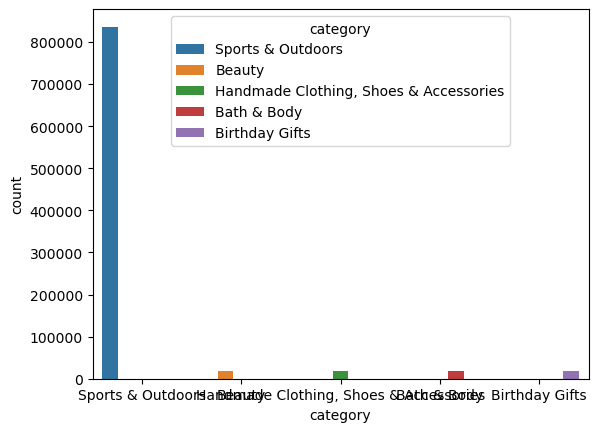

In [7]:
sns.barplot(data=top_5, x="category", y="count", hue="category")
plt.show()

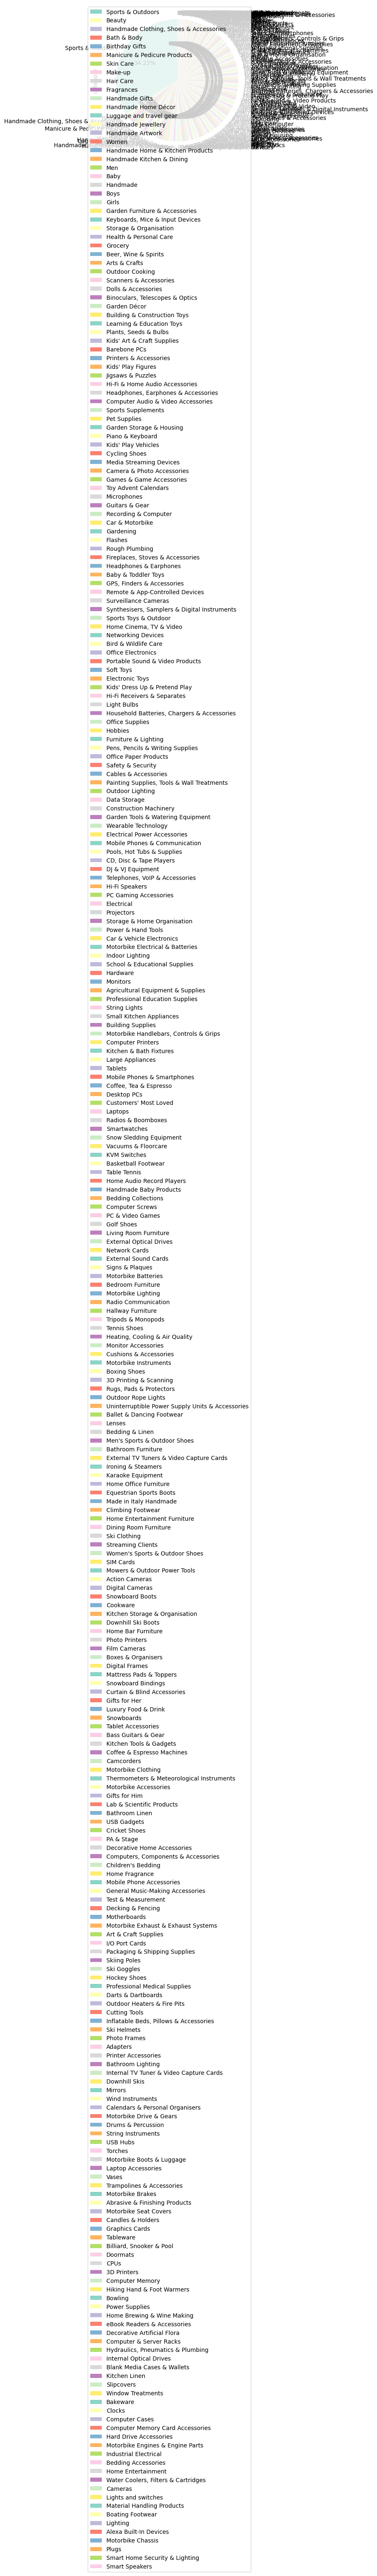

In [8]:
freq_table.plot.pie(autopct='%1.2f%%' ,startangle=90, y="count", 
              colors=sns.color_palette('Set3'))
plt.ylabel("category")
plt.show()

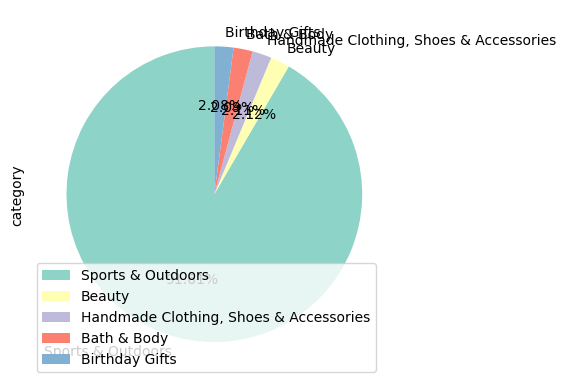

In [9]:
freq_table.head().plot.pie(autopct='%1.2f%%' ,startangle=90, y="count", 
              colors=sns.color_palette('Set3'))
plt.ylabel("category")
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [10]:
#df["price"].describe()
print("mean = ", df["price"].mean())
print("median = ", df["price"].median())
print("mode = ", df["price"].mode())

mean =  89.24380943923663
median =  19.09
mode =  0    9.99
Name: price, dtype: float64


average (89) is much higher than most common price (mode = 9.99). this means 9.99 is the price appearing most often but there are a lot of more expensive products so the average price is higher. distribution might be positive skew.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?



In [12]:
print("variance: ",round(df.price.var(), 2))
print("standard deviation: ",round(df.price.std(), 2))
print("range: ",df.price.max()-df.price.min())
print("IQR: ",df.price.quantile(0.25), " - ", df.price.quantile(0.75))

variance:  119445.49
standard deviation:  345.61
range:  100000.0
IQR:  9.99  -  45.99


there is a huge spread in prices reaching from 0 to 100'000 with most prices (50%) between 9.99 and 45.99. there are a lot of outliers.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


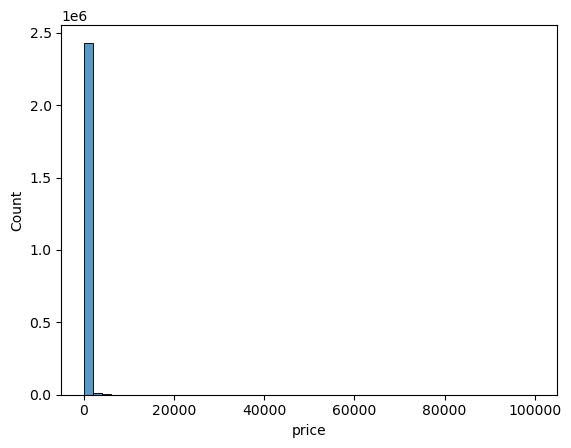

In [13]:
sns.histplot(df.price, bins=50)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


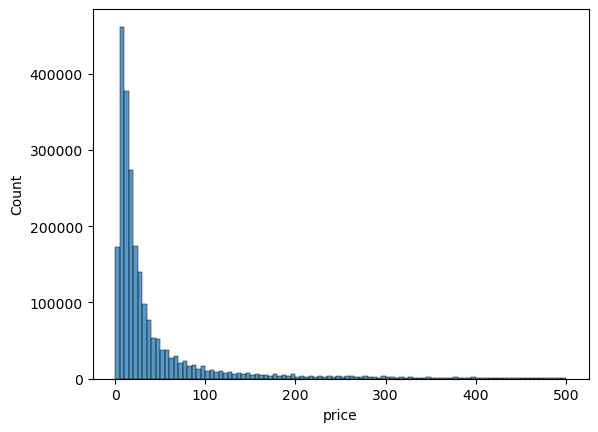

In [14]:
price_df = df[(df.price < 500) & (df.price != 0)]
sns.histplot(price_df.price, bins=100)
plt.show()

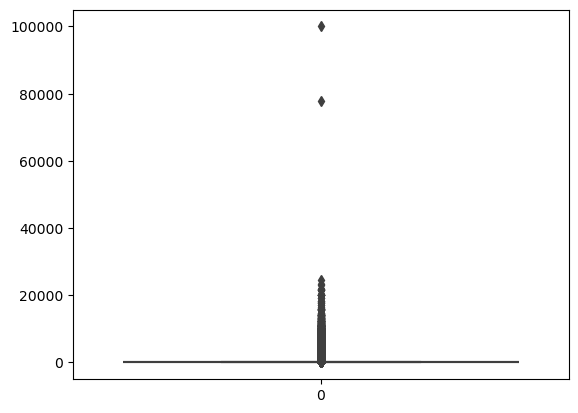

In [15]:
sns.boxplot(data=df.price)
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [16]:
print("mean rating: ",df.stars.mean().round(2))
print("median rating: ",df.stars.median())
print("mode rating: ",df.stars.mode())
#df.stars.value_counts()

mean rating:  2.15
median rating:  0.0
mode rating:  0    0.0
Name: stars, dtype: float64


most people do not rate the product (or is 0 a rating?)

In [17]:
print("variance: ",round(df.stars.var(), 2))
print("standard deviation: ",round(df.stars.std(), 2))
print("IQR: ",df.stars.quantile(0.25), " - ", df.stars.quantile(0.75))

variance:  4.82
standard deviation:  2.19
IQR:  0.0  -  4.4


there is a wide variation in customer feedback with a variance nearly as big as the range.

In [18]:
print(df.stars.skew().round(2))
print(df.stars.kurtosis().round(2))

0.08
-1.93


there is a positive skew so tailing to the right. the distribution is platykurtic (flat peak)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


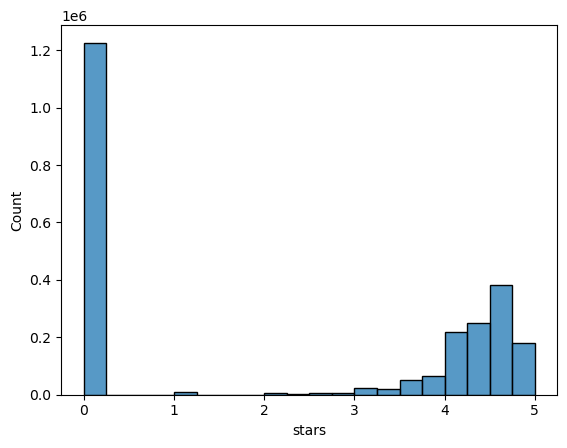

In [19]:
sns.histplot(df.stars, bins=20)
plt.show()